# Peer Review Demo in SageMaker

## Executive Summary
We provide an example of how to to perform data science experiments and collaborate with other data scientists. We will feature Exploratory Data Analysis on the Iris dataset, as well as how to build a few simple machine learning models and compare how they perform. Iris Dataset is considered as the Hello World for data science. It contains five columns namely – Petal Length, Petal Width, Sepal Length, Sepal Width, and Species Type. Iris is a flowering plant, the researchers have measured various features of the different iris flowers and recorded them digitally.

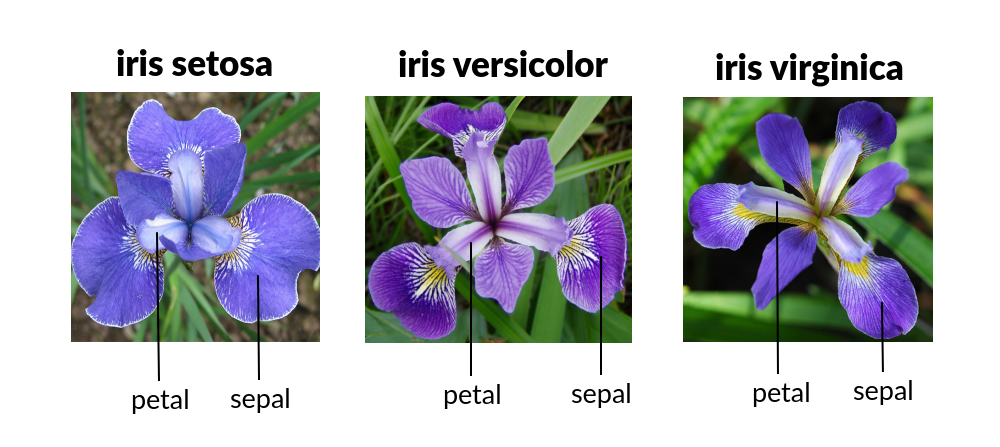

In [5]:
from IPython.display import Image
Image(filename='images/iris.png') 

### Data Description
The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository. Dataset consist of 150 different flowers, or 50 each from three different species of iris (Iris setosa, Iris versicolor, and Iris virginica). It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

* Id
* SepalLengthCm
* SepalWidthCm
* PetalLengthCm
* PetalWidthCm
* Species

### Importing Libraries

In [47]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle as pk

# for dataset spliting
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Loading Data

In [13]:
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
iris=pd.read_csv("data/Iris.csv",index_col="Id")

data/Iris.csv


## Exploratory Data Analysis

In [14]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [16]:
iris.shape

(150, 5)

In [17]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Relation between Sepal Length and Sepal Width
We will see the relationship between the sepal length and sepal width and also between petal length and petal width.

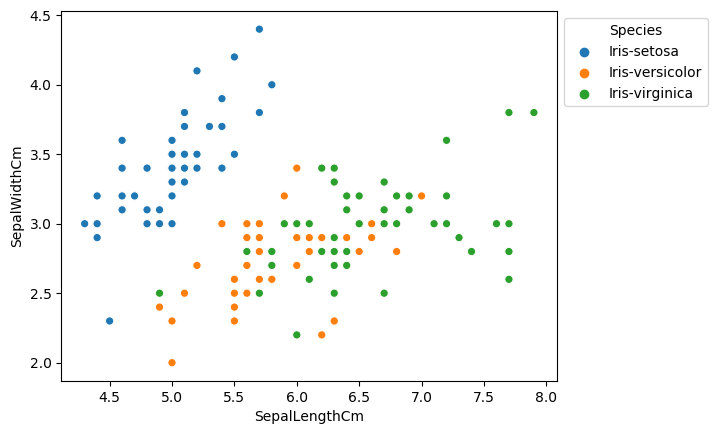

In [20]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm',
                hue='Species', data=iris, )
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

**Findings:**

* Species Setosa has smaller sepal lengths but larger sepal widths.
* Versicolor Species lies in the middle of the other two species in terms of sepal length and width
* Species Virginica has larger sepal lengths but smaller sepal widths.

### Relation between Petal Length and Petal Width
We will see the relationship between the sepal length and sepal width and also between petal length and petal width.

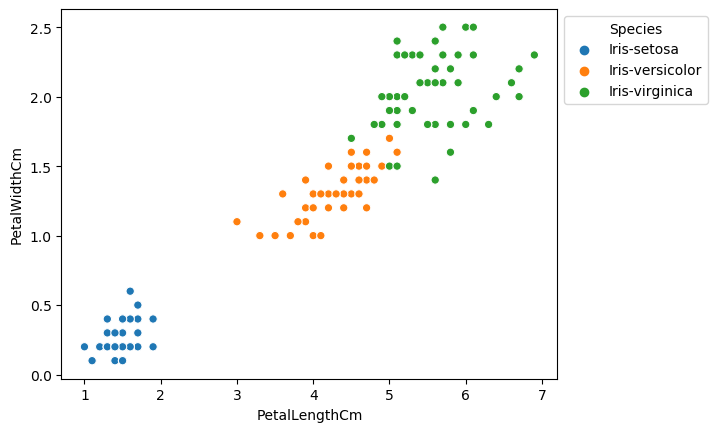

In [24]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
 
 
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm',
                hue='Species', data=iris, )
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

**Findings:**

* Species Setosa has smaller petal lengths and widths.
* Versicolor Species lies in the middle of the other two species in terms of petal length and width
* Species Virginica has the largest of petal lengths and widths.

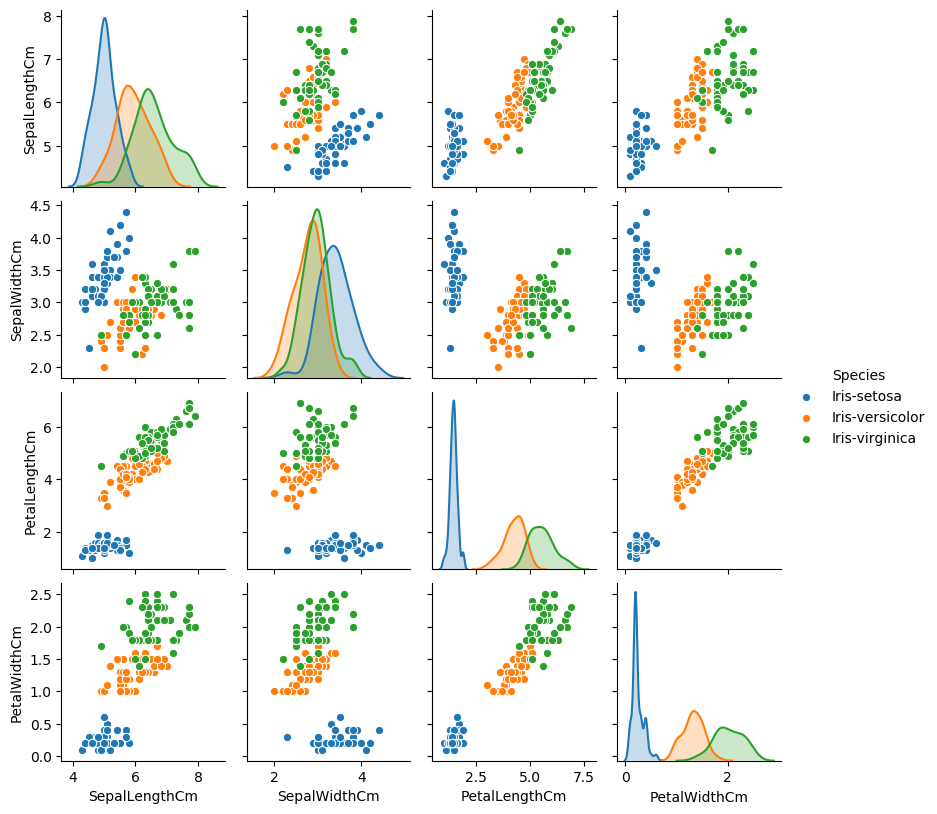

In [28]:
sns.pairplot(iris, hue='Species', height=2)

**Findings:**

We can see many types of relationships from this plot such as the species Setosa has the smallest of petals widths and lengths. It also has the smallest sepal length but larger sepal widths. Such information can be gathered about any other species.

### Histograms with Distplot Plot
Distplot is used basically for the univariant set of observations and visualizes it through a histogram i.e. only one observation and hence we choose one particular column of the dataset.

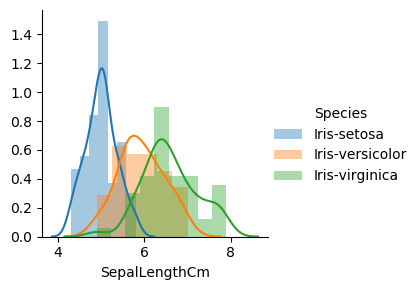

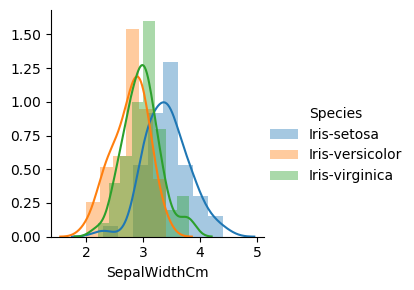

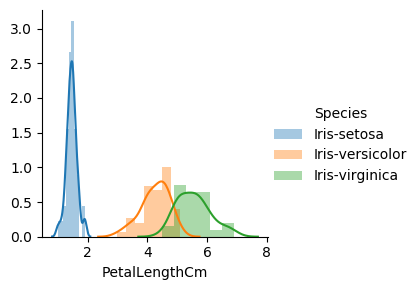

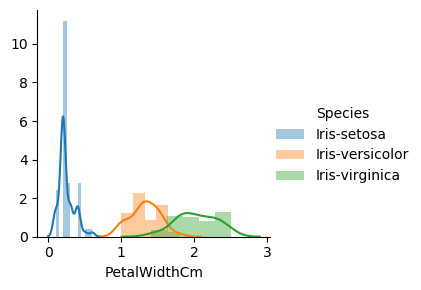

In [31]:
plot = sns.FacetGrid(iris, hue="Species")
plot.map(sns.distplot, "SepalLengthCm").add_legend()
 
plot = sns.FacetGrid(iris, hue="Species")
plot.map(sns.distplot, "SepalWidthCm").add_legend()
 
plot = sns.FacetGrid(iris, hue="Species")
plot.map(sns.distplot, "PetalLengthCm").add_legend()
 
plot = sns.FacetGrid(iris, hue="Species")
plot.map(sns.distplot, "PetalWidthCm").add_legend()
 
plt.show()

**Findings:**

* In the case of Sepal Length, there is a huge amount of overlapping.
* In the case of Sepal Width also, there is a huge amount of overlapping.
* In the case of Petal Length, there is a very little amount of overlapping.
* In the case of Petal Width also, there is a very little amount of overlapping.

So we can use Petal Length and Petal Width as the classification feature.

### Heatmaps

The heatmap is a data visualization technique that is used to analyze the dataset as colors in two dimensions. Basically, it shows a correlation between all numerical variables in the dataset. In simpler terms, we can plot the above-found correlation using the heatmaps.

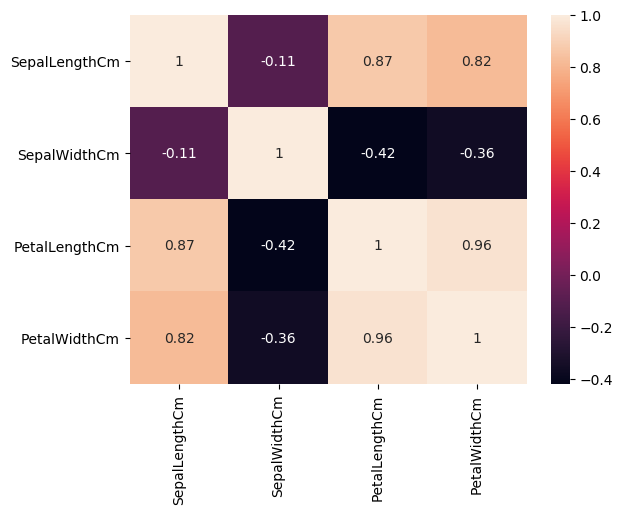

In [33]:
sns.heatmap(iris.corr(method='pearson'),
            annot = True);
 
plt.show()

**Findings:**

* Petal width and petal length have high correlations. 
* Petal length and sepal width have good correlations.
* Petal Width and Sepal length have good correlations.

### Box Plots
We can use boxplots to see how the categorical value os distributed with other numerical values.

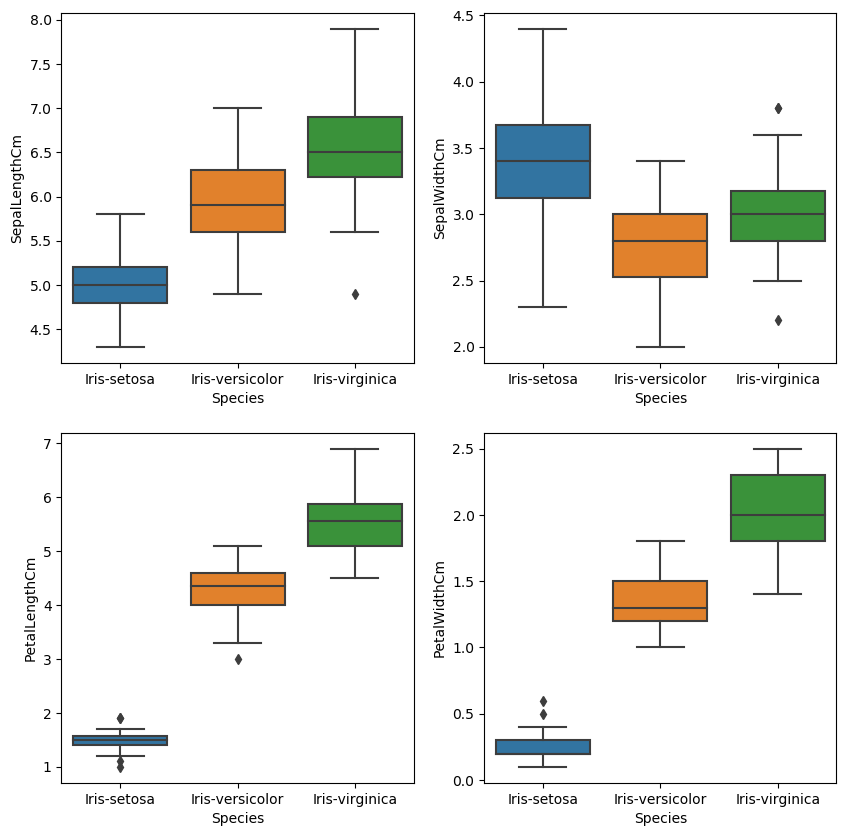

In [34]:
def graph(y):
    sns.boxplot(x="Species", y=y, data=iris)
 
plt.figure(figsize=(10,10))
     
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('SepalLengthCm')
 
plt.subplot(222)
graph('SepalWidthCm')
 
plt.subplot(223)
graph('PetalLengthCm')
 
plt.subplot(224)
graph('PetalWidthCm')
 
plt.show()

## Data Preprocessing

In [38]:
# Data preprocessing

def pre_processing(data):
    X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
    y = data['Species']

    xtrain,xtest, ytrain, ytest = train_test_split(X,y,test_size=0.33)
    
    return  xtrain,xtest, ytrain, ytest

xtrain,xtest, ytrain, ytest = pre_processing(iris)

## Modeling

LR 0.9699940582293524
CART 0.9702911467617351
KNN 0.9800950683303625
NB 0.9500891265597148
LDA 0.9803921568627452
SVM 0.9494949494949495
[array([0.97058824, 0.93939394, 1.        ]), array([0.94117647, 0.96969697, 1.        ]), array([0.97058824, 0.96969697, 1.        ]), array([0.94117647, 0.90909091, 1.        ]), array([0.94117647, 1.        , 1.        ]), array([1.        , 0.90909091, 0.93939394])]


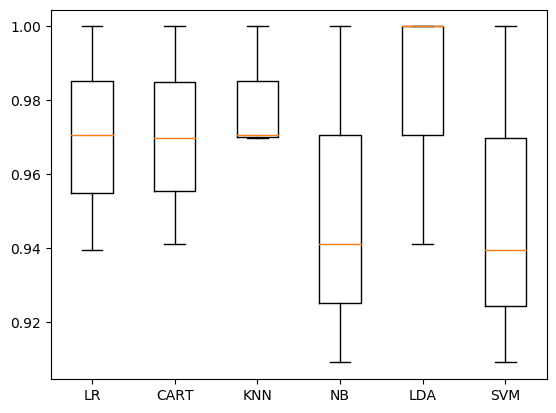

In [48]:
np.random.seed(1000)
# making a list of ml classification models
models = []

def classification_Models(xtrain,xtest, ytrain, ytest ):
    
   
    models.append( ('LR',  LogisticRegression()) )
    models.append( ('CART',DecisionTreeClassifier()) )
    models.append( ('KNN', KNeighborsClassifier()) )
    models.append( ('NB',  GaussianNB()) )
    models.append( ('LDA',  LinearDiscriminantAnalysis()) )
    models.append( ('SVM',  SVC()) )

    modeloutcomes = []
    modelnames = []
    for name,model in models:
        v_results = cross_val_score(model, xtrain, ytrain, cv = 3, 
                                     scoring='accuracy', n_jobs = -1, verbose = 0)
        print(name,v_results.mean())
        modeloutcomes.append(v_results)
        modelnames.append(name)
        
    print(modeloutcomes)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xticklabels(modelnames)
    plt.boxplot(modeloutcomes)
        
classification_Models(xtrain,xtest, ytrain, ytest)

### Modeling Evaluation

In [53]:
# Evaluating and predicting models

for name,model in models:
    trainedmodel = model.fit(xtrain,ytrain)
    
    # prediction
    ypredict = trainedmodel.predict(xtest)
    
    acc = accuracy_score(ytest,ypredict)
    classreport = classification_report(ytest,ypredict)
    confMat = confusion_matrix(ytest,ypredict)
    
    print('\n****************************'+name)
    print('The accuracy: {}'.format(acc))
    print('The Classification Report:\n {}'.format(classreport))
    print('The Confusion Matrix:\n {}'.format(confMat))
    


****************************LR
The accuracy: 0.94
The Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.94      0.88      0.91        17
 Iris-virginica       0.89      0.94      0.91        17

       accuracy                           0.94        50
      macro avg       0.94      0.94      0.94        50
   weighted avg       0.94      0.94      0.94        50

The Confusion Matrix:
 [[16  0  0]
 [ 0 15  2]
 [ 0  1 16]]

****************************CART
The accuracy: 0.94
The Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.94      0.88      0.91        17
 Iris-virginica       0.89      0.94      0.91        17

       accuracy                           0.94        50
      macro avg       0.94      0.94      0.94        50
   weighted avg       0.94      0.

## Conclusssions

We find from the above that svm performs better compared to other models.